# Reddit Webscraping
# Introduction
From a relationship advisor point of view, we would want to know if the client is looking for advices or trying to coup from a heartbreaking experience of a past relationship. This project will look into text data to different the 2 different type of text, namely relationship advices and Breakup post from Reddit. 

Subreddit used:
<br>Relationship advice: looking for opinions on how to improve or resolve relationship issue
<br>Breakups: mentioning why the breakup happen, and why it is not resolved

## Problem Statement

Create a classification model to see if a text is about relationship advice or couping from a breakup, and specific keywords for each thread. 

## Executive Summary

The data is webscrapped from 2 reddit subreddit post relationship_advice and BreakUp. A series of transformation, including StopWords removal, Stemming and Vectorization, is done to the raw data to create bag-of-words. A few model is used, mainly LiogisticRegression, Naive Bayes and a few DecisionTrees models to see which model gives us the best accuracy to differentiate the 2 different type of subreddit post. LogisticeRegression was chosen for its higher accuracy and identification of the importance of different features. Lastly, we give our analysis to the results and recommendations to further improve the research and what can be looked into next.
### Content
<br>2. Data Cleaning
<br>3. Preprocessing of text data
<br>4. EDA
<br>5. Model
<br>6. Analysis and Recommendation

# 2. Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from PIL import Image
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

## 2.1 Manual Inspection of data

In [2]:
thread_1 = 'relationship_advice'
thread_2 = 'BreakUps'

df_t1= pd.read_csv('../data/' + (str(thread_1)) + '.csv')
df_t2 = pd.read_csv('../data/' + (str(thread_2)) + '.csv')

In [3]:
df_t1.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday
0,NaN,relationship_advice,**TL;DR on Throwaways:** If you wish to reques...,t2_4det0,False,NaN,0,False,"[meta] It's not required, but if you make a ne...",[],...,/r/relationship_advice/comments/d3okss/meta_it...,all_ads,True,https://www.reddit.com/r/relationship_advice/c...,3883628,1.568378e+09,7,NaN,False,NaN
1,NaN,relationship_advice,We get the stress from social isolation is bad...,t2_4det0,False,NaN,0,False,[meta] One (1) day bans for moral judgment pos...,[],...,/r/relationship_advice/comments/g7ukh7/meta_on...,all_ads,True,https://www.reddit.com/r/relationship_advice/c...,3883628,1.587826e+09,0,NaN,False,NaN
2,NaN,relationship_advice,opps I made a typo in the title sorry! I meant...,t2_7wa6olo9,False,NaN,0,False,My (27/F) cousin (27/F) confessed that she was...,[],...,/r/relationship_advice/comments/iiscjb/my_27f_...,all_ads,False,https://www.reddit.com/r/relationship_advice/c...,3883628,1.598708e+09,0,NaN,False,NaN
3,NaN,relationship_advice,"I (F, 32) have been married to my husband (M,3...",t2_60t4vdow,False,NaN,0,False,My mom is accusing my husband of abusing our d...,[],...,/r/relationship_advice/comments/iiwkf7/my_mom_...,all_ads,False,https://www.reddit.com/r/relationship_advice/c...,3883628,1.598723e+09,0,NaN,False,NaN
4,NaN,relationship_advice,He said the hard r while reading a message tha...,t2_7q6y01ro,False,NaN,0,False,Broke up with my boyfriend because he’s racist,[],...,/r/relationship_advice/comments/ij4pj2/broke_u...,all_ads,False,https://www.reddit.com/r/relationship_advice/c...,3883628,1.598753e+09,0,NaN,False,NaN


In [4]:
# dropping first column as it is the rules as regulations for the thread
df_t1.drop(index = 0, inplace = True)
df_t1.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday
1,NaN,relationship_advice,We get the stress from social isolation is bad...,t2_4det0,False,NaN,0,False,[meta] One (1) day bans for moral judgment pos...,[],...,/r/relationship_advice/comments/g7ukh7/meta_on...,all_ads,True,https://www.reddit.com/r/relationship_advice/c...,3883628,1.587826e+09,0,NaN,False,NaN
2,NaN,relationship_advice,opps I made a typo in the title sorry! I meant...,t2_7wa6olo9,False,NaN,0,False,My (27/F) cousin (27/F) confessed that she was...,[],...,/r/relationship_advice/comments/iiscjb/my_27f_...,all_ads,False,https://www.reddit.com/r/relationship_advice/c...,3883628,1.598708e+09,0,NaN,False,NaN
3,NaN,relationship_advice,"I (F, 32) have been married to my husband (M,3...",t2_60t4vdow,False,NaN,0,False,My mom is accusing my husband of abusing our d...,[],...,/r/relationship_advice/comments/iiwkf7/my_mom_...,all_ads,False,https://www.reddit.com/r/relationship_advice/c...,3883628,1.598723e+09,0,NaN,False,NaN
4,NaN,relationship_advice,He said the hard r while reading a message tha...,t2_7q6y01ro,False,NaN,0,False,Broke up with my boyfriend because he’s racist,[],...,/r/relationship_advice/comments/ij4pj2/broke_u...,all_ads,False,https://www.reddit.com/r/relationship_advice/c...,3883628,1.598753e+09,0,NaN,False,NaN
5,NaN,relationship_advice,So where to begin...\nI (27f) am not a touchy ...,t2_76xo5mq0,False,NaN,0,False,Male friend expects/demands I hug him even tho...,[],...,/r/relationship_advice/comments/ij2bxh/male_fr...,all_ads,False,https://www.reddit.com/r/relationship_advice/c...,3883628,1.598743e+09,0,NaN,False,NaN


In [5]:
df_t2.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,media_metadata,author_cakeday,poll_data
0,NaN,BreakUps,"Hey, I really miss you. I’m sorry for texting ...",t2_7uvvphr0,False,NaN,0,False,Drunk text! Posting on here instead of actuall...,[],...,False,https://www.reddit.com/r/BreakUps/comments/ij4...,130178,1.598752e+09,0,NaN,False,NaN,NaN,NaN
1,NaN,BreakUps,I no longer have to compromise. I can do exact...,t2_aooid,False,NaN,0,False,Some positives about being single,[],...,False,https://www.reddit.com/r/BreakUps/comments/ij2...,130178,1.598742e+09,1,NaN,False,NaN,NaN,NaN
2,NaN,BreakUps,"Everyday I hear the statement, ""I would do any...",t2_4i38okh,False,NaN,0,False,Why trauma (Breakup) is a good thing,[],...,False,https://www.reddit.com/r/BreakUps/comments/ij5...,130178,1.598754e+09,0,NaN,False,NaN,NaN,NaN
3,NaN,BreakUps,"I can’t touch myself, intimately or otherwise,...",t2_39eluamz,False,NaN,0,False,I can’t take it.,[],...,False,https://www.reddit.com/r/BreakUps/comments/ij3...,130178,1.598747e+09,0,NaN,False,NaN,NaN,NaN
4,NaN,BreakUps,\nDon’t ask them back when they showed you the...,t2_4euwc4gp,False,NaN,0,False,You’re being selfish by holding on to your ex.,[],...,False,https://www.reddit.com/r/BreakUps/comments/ij7...,130178,1.598764e+09,0,NaN,False,NaN,NaN,NaN


### 2.1.1 Check for Duplicates

In [6]:
print(f'No.of duplciated post in Thread {thread_1}: {df_t1.duplicated().sum()}')
print(f'No.of duplciated post in Thread {thread_2}: {df_t2.duplicated().sum()}')

No.of duplciated post in Thread relationship_advice: 0
No.of duplciated post in Thread BreakUps: 0


### 2.1.2 Check number of post

In [7]:
print(f'No. of rows in Thread {thread_1}: {df_t1.shape[0]}')
print(f'No. of rows in Thread {thread_2}: {df_t2.shape[0]}')

No. of rows in Thread relationship_advice: 994
No. of rows in Thread BreakUps: 998


### 2.1.3 Baseline of dataset

In [8]:
df = pd.concat([df_t1,df_t2])[['subreddit', 'selftext', 'created_utc']] # combining both dataframe together, using only relevent columns
print(f'Total No. of rows in DataFrame: {df.shape[0]}')
df.subreddit.value_counts(normalize = True)

Total No. of rows in DataFrame: 1992


BreakUps               0.501004
relationship_advice    0.498996
Name: subreddit, dtype: float64

### 2.1.4 Setting target variable as binary

In [9]:
#setting target variable as binary, 1 for thread 1, 0 for thread 2
df['subreddit'] = df['subreddit'].map({thread_1 : 1, thread_2: 0}) 

#resetting index
df.reset_index(drop=True, inplace = True)
df.subreddit.value_counts(normalize = True)

0    0.501004
1    0.498996
Name: subreddit, dtype: float64

### 2.1.5 Dealing will null values

In [10]:
#checking of null values
df.isna().sum()

subreddit       0
selftext       60
created_utc     0
dtype: int64

In [11]:
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)
print(f'Null values left in df: {df.isna().sum().sum()}')
print(f'Number of rows left: {df.shape[0]}')

Null values left in df: 0
Number of rows left: 1932


# 3. EDA
## 3.1 Time of post

In [122]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit = 's')
df['created_hour'] = [d.hour for d in df['created_utc']]
df['created_minute'] = [d.minute for d in df['created_utc']]
df.head()

,subreddit,selftext,created_utc,created_hour,created_minute,created_month,created_day
0,1,We get the stress from social isolation is bad...,2020-04-25 14:40:58,14,40,4,25
1,1,opps I made a typo in the title sorry! I meant...,2020-08-29 13:26:18,13,26,8,29
2,1,"I (F, 32) have been married to my husband (M,3...",2020-08-29 17:36:57,17,36,8,29
3,1,He said the hard r while reading a message tha...,2020-08-30 01:56:54,1,56,8,30
4,1,So where to begin...\nI (27f) am not a touchy ...,2020-08-29 23:14:43,23,14,8,29


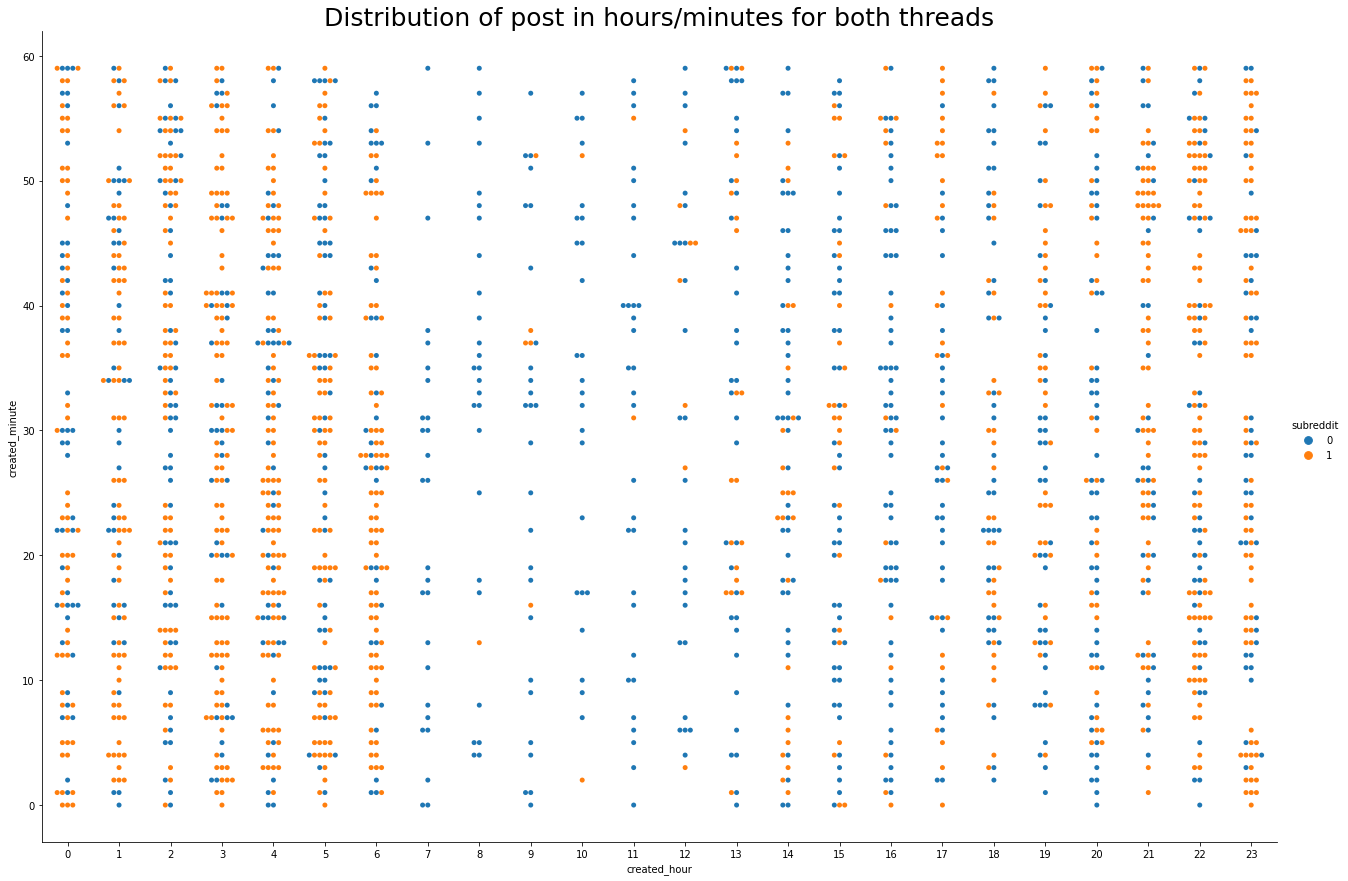

In [13]:
sorted_index = df['created_hour'].unique().sort()
fig = sns.catplot(x = 'created_hour',
                  y = 'created_minute',
                  hue = 'subreddit', #1 = thread_1,0 = thread_2 
                  data = df,
                  kind = 'swarm', 
                  height = 12,
                  aspect = 1.5,
                  order = sorted_index)

plt.title('Distribution of post in hours/minutes for both threads', fontdict = {'fontsize': 25})

ax= fig.axes[0][0]
ax.set_yscale('linear')
plt.show()

### 3.1 Comments
interestingly, most relationship advice post are not posted inbetween 6am - 12pm 

## 3.2 Average length of post in each thread

In [14]:
len_of_t1_post = 0
len_of_t2_post = 0
t1_counter = 0
t2_counter = 0

for i in range(len(df)):
    if df['subreddit'][i] == 1:
        t1_counter += 1
        len_of_t1_post += (len(df['selftext'][i].split())) #spliting the text data to words
    else:
        t2_counter += 1
        len_of_t2_post += (len(df['selftext'][i].split()))
        
print(f'Average number of words in {thread_1} post: {round(len_of_t1_post/t1_counter)}')
print(f'Average number of words in {thread_2} post: {round(len_of_t2_post/t2_counter)}')

Average number of words in relationship_advice post: 367
Average number of words in BreakUps post: 256


### 3.2 comments
post in Breakup threads has about 100 less words on average compared to relationship advices post

# 4. Preprocessing of data
## 4.2 Creating Bag-Of-Words model
### 4.1.1 Train test split data

In [15]:
#Train test split the data
X_train, X_test, y_train, y_test = train_test_split(df['selftext'],
                                                    df['subreddit'],
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    stratify = df['subreddit'])

In [16]:
print(f'X_train rows: {X_train.shape[0]}, X_test rows: {X_test.shape[0]}')
print(f'y_train rows: {y_train.shape[0]}, y_test rows: {y_test.shape[0]}')

X_train rows: 1545, X_test rows: 387
y_train rows: 1545, y_test rows: 387


In [17]:
X_train.head()

130     My bf is always walking in front of me and let...
1193    Got dumped very recently and it's been a very ...
544     I met "Hannah" about a year ago at the univers...
1623    My world seems so empty without you. I have wo...
181     I have been dating my bf for almost 8 years. O...
Name: selftext, dtype: object

In [18]:
X_train.index[0]

130

In [19]:
X_train[X_train.index[0]] #selecting first index row of train text

'My bf is always walking in front of me and letting the door hit me whenever we go anywhere and he’s also probably gonna join the military soon so what should I do'

### 4.1.2 Removing HTML Features

In [20]:
# Removing HTML features if present
example1 = BeautifulSoup(X_train[X_train.index[0]])


print('Before')
print(X_train[X_train.index[0]])
print()
print('AFTER')
print(example1.get_text())

Before
My bf is always walking in front of me and letting the door hit me whenever we go anywhere and he’s also probably gonna join the military soon so what should I do

AFTER
My bf is always walking in front of me and letting the door hit me whenever we go anywhere and he’s also probably gonna join the military soon so what should I do


### 4.1.3 Removing numerical values

In [21]:
letters_only = re.sub('[^a-zA-Z]',
                     " ",
                     example1.get_text())

letters_only[:50]

'My bf is always walking in front of me and letting'

### 4.1.4 Lowercase text

In [22]:
#lowercase text
lower_case = letters_only.lower()
#splitting text to strings
words = lower_case.split()
words[:10]

['my', 'bf', 'is', 'always', 'walking', 'in', 'front', 'of', 'me', 'and']

### 4.1.5 Removing stopwords

In [23]:
words = [w for w in words if w not in stopwords.words('english')]
words[:10]

['bf',
 'always',
 'walking',
 'front',
 'letting',
 'door',
 'hit',
 'whenever',
 'go',
 'anywhere']

### 4.1.6 Stemming text

In [24]:
p_stemmer = PorterStemmer()
words_pstem = [p_stemmer.stem(i) for i in words]

In [25]:
# Print only those stemmed tokens that are different.
for i in range(len(words)):
    if words[i] != words_pstem[i]:
        print((words[i], words_pstem[i]))

('always', 'alway')
('walking', 'walk')
('letting', 'let')
('whenever', 'whenev')
('anywhere', 'anywher')
('probably', 'probabl')
('military', 'militari')


## 4.2 Creating function for preprocessing of text

In [26]:
def words_cleaning(text):
    #removing HTML Features
    bs_text = BeautifulSoup(text).get_text()
    
    #Removing numerical values
    letters_only = re.sub('[^a-zA-Z]', " ", bs_text)

    #Lowercasing text
    lower_case = letters_only.lower() 
    
    #splitting text to strings
    words = lower_case.split()
    
    #removing Stopwords
    lowercase_words = [w for w in words if w not in stopwords.words('english')]
    
    #stemming text
    p_stemmer = PorterStemmer()
    words_pstem = [p_stemmer.stem(i) for i in lowercase_words]
    
    #join words
    join_words = (" ".join(words_pstem))
    
    #convert type to object
    return(join_words)

### 4.2.1 Preprocessing of text for model

In [27]:
total_text = len(df.selftext)
print(f'There is a total of {total_text} selftext.')

#instantiate empty list to hold cleaned data
clean_train_text = []
clean_test_text = []

There is a total of 1932 selftext.


In [28]:
print("Cleaning and parsing the training set text...")

# Instantiate counter.
j = 0

# For every review in our training set...
for train_text in X_train:
    
    # Convert text to words, then append to clean_train_text.
    clean_train_text.append(words_cleaning(train_text))
    
    # If the index is divisible by 100, print a message.
    if (j + 1) % 100 == 0:
        print(f'selftext {j + 1} of {total_text}.')
    
    j += 1

# Let's do the same for our testing set.
print("Cleaning and parsing the testing set text...")

# For every review in our testing set...
for test_text in X_test:
    
    # Convert review to words, then append to clean_train_reviews.
    clean_test_text.append(words_cleaning(test_text))
    
    # If the index is divisible by 100, print a message.
    if (j + 1) % 100 == 0:
        print(f'selftext {j + 1} of {total_text}.')
        
    j += 1
    
print(f'selftext {total_text} of {total_text}.')    
print('Cleaning complete')

Cleaning and parsing the training set text...
selftext 100 of 1932.
selftext 200 of 1932.
selftext 300 of 1932.
selftext 400 of 1932.
selftext 500 of 1932.
selftext 600 of 1932.
selftext 700 of 1932.
selftext 800 of 1932.
selftext 900 of 1932.
selftext 1000 of 1932.
selftext 1100 of 1932.
selftext 1200 of 1932.
selftext 1300 of 1932.
selftext 1400 of 1932.
selftext 1500 of 1932.
Cleaning and parsing the testing set text...
selftext 1600 of 1932.
selftext 1700 of 1932.
selftext 1800 of 1932.
selftext 1900 of 1932.
selftext 1932 of 1932.
Cleaning complete


###  4.2.2 Visualizing processed data

In [29]:
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 5000)

train_data_features = vectorizer.fit_transform(clean_train_text)
test_data_features = vectorizer.transform(clean_test_text)

print(train_data_features.shape)
print(test_data_features.shape)

(1545, 5000)
(387, 5000)


In [30]:
vocab = vectorizer.get_feature_names()
vocab[:10]

['aaaannnyyyway',
 'ab',
 'aback',
 'abandon',
 'abil',
 'abit',
 'abiut',
 'abl',
 'abnorm',
 'aborm']

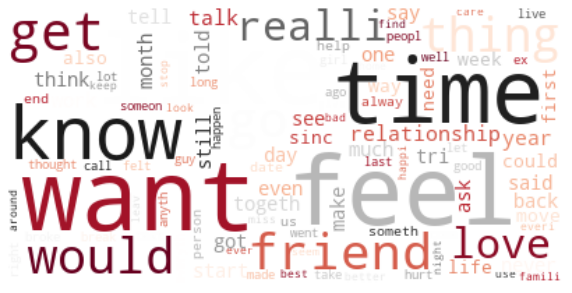

In [31]:
common_words = pd.DataFrame(train_data_features.toarray(), columns = vocab).sum().sort_values(ascending = False)

wordcloud = WordCloud(max_font_size=70,
                      max_words=100,
                      background_color="white",
                      colormap='RdGy')
wordcloud.generate_from_frequencies(frequencies=common_words)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 5. Model

## 5.1 Baseline model

In [32]:
# Instantiate logistic regression model.
lr = LogisticRegression(solver = 'lbfgs', max_iter = 5000)

# Fit model to training data.
lr.fit(train_data_features, y_train)

# Evaluate model on training data.
print(f'R2 score for Train data set: {lr.score(train_data_features, y_train)}')

# Evaluate model on testing data.
print(f'R2 score for Test data set: {lr.score(test_data_features, y_test)}')

R2 score for Train data set: 0.9967637540453075
R2 score for Test data set: 0.8113695090439277


### 5.1 comments 
the train dataset has a much higher accuracy compared to test data, suggesting a overfitting of features

In [33]:
preds = lr.predict(test_data_features)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()


print(f'Specificity: {round(tn / (tn + fp),4)}')
print(f'Sensitivity: {round(tp / (tp + fn),4)}')

Specificity: 0.8511
Sensitivity: 0.7739


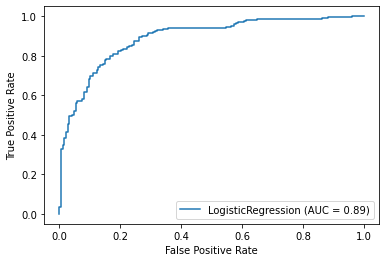

In [37]:
plot_roc_curve(lr, test_data_features, y_test);

## 5.2 Testing with different transformer

### 5.2.1 CountVectorizer Logistic Regression

In [38]:
# Setting pipeline for two stages
cvec_lr = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter = 5000))
])

pipe_params = {
    'cvec__max_features': [2000, 3000, 4000],
    'cvec__min_df': [3, 4, 5],
    'cvec__max_df': [.6, .7 ,.8],
    'cvec__ngram_range': [(1,1), (1,2)]
}

gs_cvec_lr = GridSearchCV(cvec_lr, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.
t0 = time()
gs_cvec_lr.fit(clean_train_text, y_train)
cvec_test_time = time() - t0
print(f'Best CVEC Parameters: {gs_cvec_lr.best_estimator_[0]}')
print('Fit time:  %0.3fs' % cvec_test_time);

Best CVEC Parameters: CountVectorizer(max_df=0.6, max_features=4000, min_df=4, ngram_range=(1, 2))
Fit time:  106.642s


### 5.2.2 TFIDVectorizer Logistic Regression

In [39]:
# Setting pipeline for two stages
tfid_lr = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter = 5000))
])

pipe_params = {
    'tfid__max_features': [1000, 2000, 3000],
    'tfid__min_df': [2, 3, 4],
    'tfid__max_df': [.3, .4, .5],
    'tfid__ngram_range': [(1,1), (1,2)]
}

gs_tfid_lr = GridSearchCV(tfid_lr, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.
t0 = time()
gs_tfid_lr.fit(clean_train_text, y_train)
tfid_test_time = time() - t0
print(f'Best TFID Parameters: {gs_tfid_lr.best_estimator_[0]}')
print('Fit time:  %0.3fs' % tfid_test_time);

Best TFID Parameters: TfidfVectorizer(max_df=0.4, max_features=2000, min_df=3)
Fit time:  79.318s


### 5.2.3 HashingVectorizer Logistic Regression

In [40]:
# Setting pipeline for two stages
hash_lr = Pipeline([
    ('hash', HashingVectorizer()),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter = 5000))
])

pipe_params = {
    'hash__n_features': [1000, 2000, 3000, 4000, 5000],
    'hash__ngram_range': [(1,1), (1,2)]
}

gs_hash_lr = GridSearchCV(hash_lr, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

t0 = time()
gs_hash_lr.fit(clean_train_text, y_train)
hash_test_time = time() - t0
print(f'Best HASH Parameters: {gs_hash_lr.best_estimator_[0]}')
print('Fit time:  %0.3fs' % hash_test_time);

Best HASH Parameters: HashingVectorizer(n_features=4000)
Fit time:  12.115s


### 5.2.4 R2 Scores & ROC AUC Plot (Vectorizer)

In [41]:
print(f'CVEC LogReg Train Score: {gs_cvec_lr.best_score_}')
print(f'CVEC LogReg Test Score: {gs_cvec_lr.score(clean_test_text,y_test)}')
print(f'CVEC Fit Time: {cvec_test_time}')
print('---')
print(f'TFID LogReg Train Score: {gs_tfid_lr.best_score_}')
print(f'TFID LogReg Test Score: {gs_tfid_lr.score(clean_test_text,y_test)}')
print(f'TFID Fit Time: {tfid_test_time}')
print('---')
print(f'HASH LogReg Train Score: {gs_hash_lr.best_score_}')
print(f'HASH LogReg Test Score: {gs_hash_lr.score(clean_test_text,y_test)}')
print(f'HASH Fit Time: {hash_test_time}')

CVEC LogReg Train Score: 0.8297734627831715
CVEC LogReg Test Score: 0.8191214470284238
CVEC Fit Time: 106.6418228149414
---
TFID LogReg Train Score: 0.8595469255663429
TFID LogReg Test Score: 0.8475452196382429
TFID Fit Time: 79.31767916679382
---
HASH LogReg Train Score: 0.8401294498381876
HASH LogReg Test Score: 0.8320413436692506
HASH Fit Time: 12.115142583847046


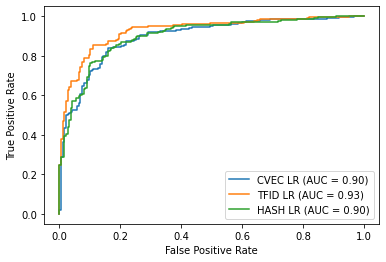

In [42]:
cvec_lr_disp = plot_roc_curve(gs_cvec_lr, clean_test_text, y_test, name = 'CVEC LR')
tfid_lr_disp = plot_roc_curve(gs_tfid_lr, clean_test_text, y_test, name = 'TFID LR', ax = cvec_lr_disp.ax_)
hash_lr_disp = plot_roc_curve(gs_hash_lr, clean_test_text, y_test, name = 'HASH LR', ax = cvec_lr_disp.ax_);

optimally, using TFID seems to return better result, will attempt to loop through different models to see which is better

## 5.3 Testing with different models
### 5.3.1 TFIDVectorizer LogisticRegression (Hyperparameter for model)

In [49]:
# Setting pipeline for two stages
tfid_lr = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter = 5000))
])

pipe_params = {
    'tfid__max_features': [1000, 2000, 3000],
    'tfid__min_df': [2, 3, 4],
    'tfid__max_df': [.3, .4, .5],
    'tfid__ngram_range': [(1,1), (1,2)],
    'lr__C': list(np.linspace(0.1,1,5))
}

gs_tfid_lr = GridSearchCV(tfid_lr, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.
t0 = time()
gs_tfid_lr.fit(clean_train_text, y_train)
tfid_test_time = time() - t0
print(f'Best TFID Parameters: {gs_tfid_lr.best_estimator_}')
print('Fit time:  %0.3fs' % tfid_test_time);

Best TFID Parameters: Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_df=0.4, max_features=2000, min_df=3)),
                ('lr', LogisticRegression(max_iter=5000))])
Fit time:  386.381s


### 5.3.1 TFIDVectorizer KNeighborsClassifier

In [52]:
# Setting pipeline for two stages
tfid_knn = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

pipe_params = {
    'tfid__max_features': [1000, 2000, 3000],
    'tfid__min_df': [2, 3, 4],
    'tfid__max_df': [.2, .3, .4 ],
    'tfid__ngram_range': [(1,1), (1,2)],
    'knn__n_neighbors': [10,15],
    'knn__p': [1,2]
}

gs_tfid_knn = GridSearchCV(tfid_knn, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

t0 = time()
gs_tfid_knn.fit(clean_train_text, y_train)
knn_test_time = time() - t0
print(f'Best KNN Parameters: {gs_tfid_knn.best_estimator_}')
print('Fit time:  %0.3fs' % knn_test_time);

Best KNN Parameters: Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_df=0.3, max_features=1000, min_df=2,
                                 ngram_range=(1, 2))),
                ('knn', KNeighborsClassifier(n_neighbors=15))])
Fit time:  348.438s


### 5.3.2 TFIDVectorizer MultinomialNB
- MultinomialNB is the best choice here, as the X Variables are all integer counts

In [53]:
# Setting pipeline for two stages
tfid_nb = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

pipe_params = {
    'tfid__max_features': [1000, 2000, 3000],
    'tfid__min_df': [2, 3, 4],
    'tfid__max_df': [.3, .4, .5],
    'tfid__ngram_range': [(1,1), (1,2)],
    'nb__alpha': list(np.linspace(0.1,1,5))
}

gs_tfid_nb = GridSearchCV(tfid_nb, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

t0 = time()
gs_tfid_nb.fit(clean_train_text, y_train)
nb_test_time = time() - t0
print(f'Best NB Parameters: {gs_tfid_nb.best_estimator_}')
print('Fit time:  %0.3fs' % nb_test_time);

Best NB Parameters: Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_df=0.4, max_features=1000, min_df=2,
                                 ngram_range=(1, 2))),
                ('nb', MultinomialNB())])
Fit time:  362.923s


### 5.3.3 TFIDVectorizer DecisionTreeClassifier

In [54]:
# Setting pipeline for two stages
tfid_cart = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('cart', DecisionTreeClassifier())
])

pipe_params = {
    'tfid__max_features': [1000, 2000, 3000],
    'tfid__min_df': [2, 3, 4],
    'tfid__max_df': [.3, .4, .5],
    'tfid__ngram_range': [(1,1), (1,2)],
    'cart__min_samples_split': [100 ,200, 300],
    'cart__ccp_alpha': [0, 0.001, 0.01]
}

gs_tfid_cart = GridSearchCV(tfid_cart, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

t0 = time()
gs_tfid_cart.fit(clean_train_text, y_train)
cart_test_time = time() - t0
print(f'Best CART Parameters: {gs_tfid_cart.best_estimator_}')
print('Fit time:  %0.3fs' % cart_test_time);

Best CART Parameters: Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_df=0.5, max_features=1000, min_df=2,
                                 ngram_range=(1, 2))),
                ('cart',
                 DecisionTreeClassifier(ccp_alpha=0.001,
                                        min_samples_split=200))])
Fit time:  839.556s


### 5.3.4 TFIDVectorizer BaggingClassifier

In [55]:
# Setting pipeline for two stages
tfid_bag = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('bag', BaggingClassifier())
])

pipe_params = {
    'tfid__max_features': [1000, 2000, 3000],
    'tfid__min_df': [2, 3, 4],
    'tfid__max_df': [.3, .4, .5],
    'tfid__ngram_range': [(1,1), (1,2)]
}

gs_tfid_bag = GridSearchCV(tfid_bag, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.
t0 = time()
gs_tfid_bag.fit(clean_train_text, y_train)
bag_test_time = time() - t0
print(f'Best BAG Parameters: {gs_tfid_bag.best_estimator_}')
print('Fit time:  %0.3fs' % bag_test_time);

Best BAG Parameters: Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_df=0.3, max_features=1000, min_df=2,
                                 ngram_range=(1, 2))),
                ('bag', BaggingClassifier())])
Fit time:  325.923s


### 5.3.5 TFIDVectorizer ADABoostClassifier

In [57]:
# Setting pipeline for two stages
tfid_ada = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('ada', AdaBoostClassifier())
])

pipe_params = {
    'tfid__max_features': [2000, 3000],
    'tfid__min_df': [3, 4],
    'tfid__max_df': [.3, .4],
    'ada__n_estimators': [50,100],
    'ada__learning_rate': [0.9, 1]
}

gs_tfid_ada = GridSearchCV(tfid_ada, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.
t0 = time()
gs_tfid_ada.fit(clean_train_text, y_train)
ada_test_time = time() - t0
print(f'Best ADABoost Parameters: {gs_tfid_ada.best_estimator_}')
print('Fit time:  %0.3fs' % ada_test_time);

Best ADABoost Parameters: Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_df=0.3, max_features=3000, min_df=4,
                                 ngram_range=(1, 2))),
                ('ada',
                 AdaBoostClassifier(learning_rate=0.9, n_estimators=100))])
Fit time:  1730.516s


### 5.3.5 R2 Scores & ROC AUC Plot (Model)

In [58]:
print(f'TFID LogReg Train Score: {gs_tfid_lr.best_score_}')
print(f'TFID LogReg Test Score: {gs_tfid_lr.score(clean_test_text,y_test)}')
print(f'LogReg Fit Time: {tfid_test_time}')
print('---')
print(f'TFID KNN Train Score: {gs_tfid_knn.best_score_}')
print(f'TFID KNN Test Score: {gs_tfid_knn.score(clean_test_text,y_test)}')
print(f'KNN Fit Time: {knn_test_time}')
print('---')
print(f'TFID NB Train Score: {gs_tfid_nb.best_score_}')
print(f'TFID NB Test Score: {gs_tfid_nb.score(clean_test_text,y_test)}')
print(f'NB Fit Time: {nb_test_time}')
print('---')
print(f'TFID CART Train Score: {gs_tfid_cart.best_score_}')
print(f'TFID CART Test Score: {gs_tfid_cart.score(clean_test_text,y_test)}')
print(f'CART Fit Time: {cart_test_time}')
print('---')
print(f'TFID BAG Train Score: {gs_tfid_bag.best_score_}')
print(f'TFID BAG Test Score: {gs_tfid_bag.score(clean_test_text,y_test)}')
print(f'BAG Fit Time: {bag_test_time}')
print('---')
print(f'TFID ADABoost Train Score: {gs_tfid_ada.best_score_}')
print(f'TFID ADABoost Test Score: {gs_tfid_ada.score(clean_test_text,y_test)}')
print(f'ADABoost Fit Time: {ada_test_time}')

TFID LogReg Train Score: 0.8595469255663429
TFID LogReg Test Score: 0.8475452196382429
LogReg Fit Time: 386.3807463645935
---
TFID KNN Train Score: 0.7967637540453074
TFID KNN Test Score: 0.7596899224806202
KNN Fit Time: 348.4378471374512
---
TFID NB Train Score: 0.8563106796116505
TFID NB Test Score: 0.8423772609819121
NB Fit Time: 362.9232039451599
---
TFID CART Train Score: 0.7566343042071197
TFID CART Test Score: 0.6795865633074936
CART Fit Time: 839.5561213493347
---
TFID BAG Train Score: 0.8103559870550162
TFID BAG Test Score: 0.7441860465116279
BAG Fit Time: 325.92272663116455
---
TFID ADABoost Train Score: 0.8135922330097086
TFID ADABoost Test Score: 0.8062015503875969
ADABoost Fit Time: 1730.5161390304565


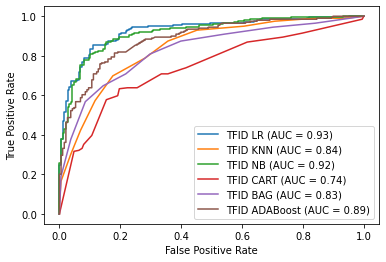

In [59]:
tfid_lr_disp = plot_roc_curve(gs_tfid_lr, clean_test_text, y_test, name = 'TFID LR')
tfid_knn_disp = plot_roc_curve(gs_tfid_knn, clean_test_text, y_test, name = 'TFID KNN', ax = tfid_lr_disp.ax_)
tfid_nb_disp = plot_roc_curve(gs_tfid_nb, clean_test_text, y_test, name = 'TFID NB', ax = tfid_lr_disp.ax_)
tfid_cart_disp = plot_roc_curve(gs_tfid_cart, clean_test_text, y_test, name = 'TFID CART', ax = tfid_lr_disp.ax_)
tfid_bag_disp = plot_roc_curve(gs_tfid_bag, clean_test_text, y_test, name = 'TFID BAG', ax = tfid_lr_disp.ax_)
tfid_ada_disp = plot_roc_curve(gs_tfid_ada, clean_test_text, y_test, name = 'TFID ADABoost', ax = tfid_lr_disp.ax_);

#### 5.3.3 comments:
- TFID LR and RFID NB has similar AUC score
- NB has a smaller difference of r2 score compared to LR
- Will use LogisticRegression for the final analysis, as it will better tell us the importance of certain keywords from threads

## 5.4 Confusion Matrix

In [60]:
#check best estimator for best performing model
gs_tfid_lr.best_estimator_

Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_df=0.4, max_features=2000, min_df=3)),
                ('lr', LogisticRegression(max_iter=5000))])

In [61]:
# Using the best model
predictions = gs_tfid_lr.predict(clean_test_text)

In [62]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print(f'Specificity: {round(tn / (tn + fp),4)}')
print(f'Sensitivity: {round(tp / (tp + fn),4)}')

True Negatives: 153
False Positives: 35
False Negatives: 24
True Positives: 175
Specificity: 0.8138
Sensitivity: 0.8794


R2 score of model for both train and test data is very close, suggesting the overfitting issue is resolved

# 6. Analysis and Recommendation

In [63]:
gs_tfid_lr.best_estimator_

Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_df=0.4, max_features=2000, min_df=3)),
                ('lr', LogisticRegression(max_iter=5000))])

In [64]:
thread_1_bag = pd.DataFrame(data = [gs_tfid_lr.best_estimator_.named_steps['tfid'].get_feature_names(),
                     gs_tfid_lr.best_estimator_.named_steps['lr'].coef_[0]]).T.rename(columns = {0 : 'Features', 1: 'Coef'}).sort_values(by = 'Coef', ascending = False).reset_index(drop = True)

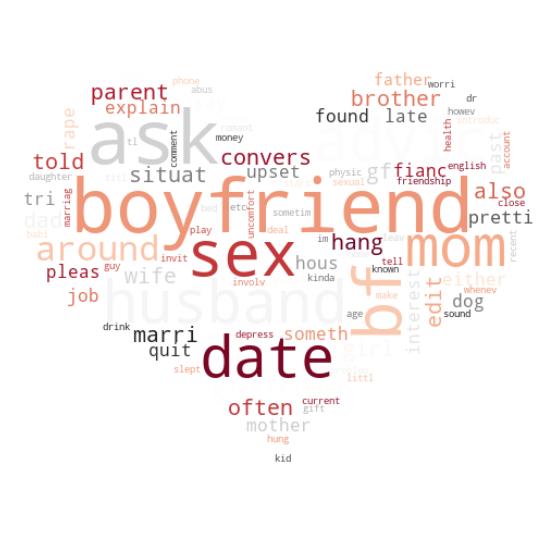

In [65]:
d = {}
for a, x in thread_1_bag.values:
    d[a] = x

mask = np.array(Image.open('../images/heart.jpg'))

wordcloud = WordCloud(max_font_size=70,
                      max_words=100,
                      background_color="white",
                      colormap='RdGy',
                      mask = mask)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [66]:
thread_2_bag = pd.DataFrame(data = [gs_tfid_lr.best_estimator_.named_steps['tfid'].get_feature_names(),
                     gs_tfid_lr.best_estimator_.named_steps['lr'].coef_[0]]).T.rename(columns = {0 : 'Features', 1: 'Coef'}).sort_values(by = 'Coef', ascending = True).reset_index(drop = True)

In [67]:
thread_2_bag['Coef'] = thread_2_bag['Coef']*-1

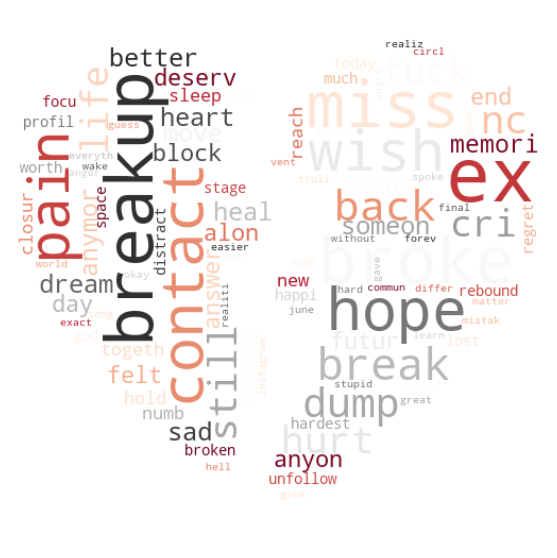

In [68]:
d = {}
for a, x in thread_2_bag.values:
    d[a] = x

mask = np.array(Image.open('../images/heartbreak.jpg'))

wordcloud = WordCloud(max_font_size=70,
                      max_words=100,
                      background_color="white",
                      colormap='RdGy',
                      mask = mask)

wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

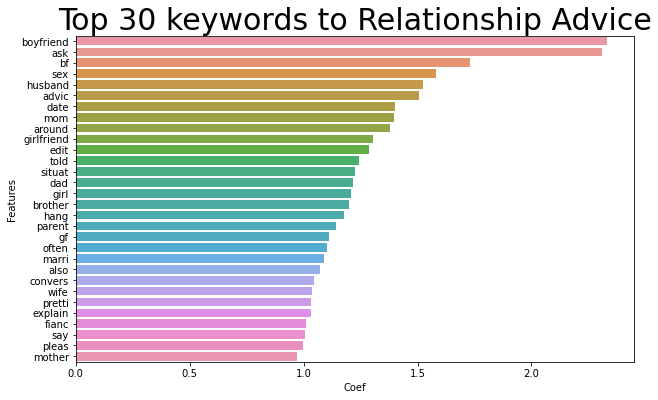

In [69]:
plt.figure(figsize= (10, 6))
plt.title('Top 30 keywords to Relationship Advice',fontdict = {'fontsize': 30})
sns.barplot(x = thread_1_bag['Coef'][:30], y = thread_1_bag['Features'][:30]);

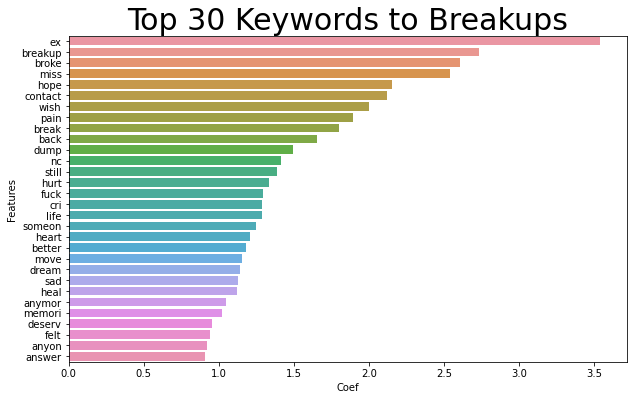

In [70]:
plt.figure(figsize= (10, 6))
plt.title('Top 30 Keywords to Breakups',fontdict = {'fontsize': 30})
sns.barplot(x = thread_2_bag['Coef'][:30], y = thread_2_bag['Features'][:30]);